In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [90]:
def desired_function(x):
    x = np.exp(-x) * np.sin(np.pi * x)
    return x

def generate_M(Psi):
    N = Psi.shape[0] # length of Psi + 2
    indices = np.arange(N)  # array containing indices from 0 to N-1
    last_column = (-1) ** indices  # the alternating sign column
    last_column = last_column[:, np.newaxis]  # reshape to column vector
    first_column = np.ones(N)
    first_column = first_column[:, np.newaxis]
    inner_column = np.power(Psi[:, np.newaxis], np.arange(1, N-1))
    M = np.hstack((first_column, inner_column, last_column))
    return M

def generate_F(Psi):
    return desired_function(Psi)

def generate_A(Psi):
    M = generate_M(Psi)
    F = generate_F(Psi)
    A = np.linalg.solve(M, F)
    return A

def evaluate_polynomial_number(coeffs, x):
    result = 0
    for i in range(len(coeffs) - 1):  # Exclude the last coefficient
        result += coeffs[i] * (x ** i)
    return result

def actual_function(A, boundaries, N):
    x_values = np.linspace(boundaries[0], boundaries[1], N)
    polynomial_values = np.zeros(N)
    for i, value in enumerate(x_values):
        polynomial_values[i] = evaluate_polynomial_number(A, value)
    return polynomial_values

def error_function(f_x, p_x):
    return f_x - p_x

def find_max_error_index(e_x):
    return np.argmax(np.abs(e_x))

def find_max_error_value(e_x):
    return np.max(np.abs(e_x))
    
def update_ref_set(Psi, e_x):
    index_max = find_max_error_index(e_x)   # index of the max error in e_x
    x_max = index_max / len(e_x)    # x-coordinate value of the max error
    max_error = e_x[index_max]      # exact, signed value of the max error
    # replace Psi[i] with x_max to update the reference set
    # find the closest index of the element the closest to x_max n Psi
    closest_index = np.abs(Psi - x_max).argmin()
    

array([0.        , 0.33333333, 0.66666667, 1.        ])

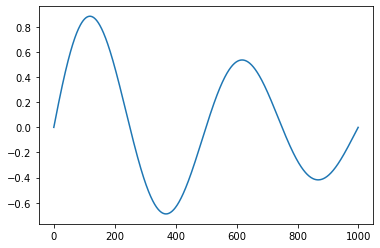

In [94]:
# create the initial reference set (P + 2 = 4)
P = 2# order of the polynomial
# generate initial reference set
Psi = np.linspace(0, 1, P + 2)
A = generate_A(Psi)
f_x = desired_function(np.linspace(0, 1, 1000))
p_x = actual_function(A, [0, 1], 1000)
e_x = error_function(f_x, e_x)
plt.plot(e_x)
Psi